In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sys import path
path.append('../code/')

from diagnostics import *

%matplotlib inline

# This is an example notebook of how to use the functions in code/diagnostics.py, which can be used to reproduce the plots in Dorn-Wallenstein & Levesque (2018, ApJ). It is currently the site of ongoing work for Dorn-Wallenstein & Levesque (2019...?). The functions in diagnostics.py have been updated to include calculations with the Geneva rotating and non-rotating tracks.

# Author: Trevor Dorn-Wallenstein

First, let's plot up the predicted number of various stellar species at various metallicities vs. time. These are raw outputs from the Binary Population and Stellar Synthesis code by J. J. Eldridge, v.2.2.1.

This utilizes get_arrs, which accesses a hdf5 file with the data in it. It's quite flexible! You can specify a subtype, metallicity, and luminosity cutoff, in addition to a star-formation history (see documentation).

/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


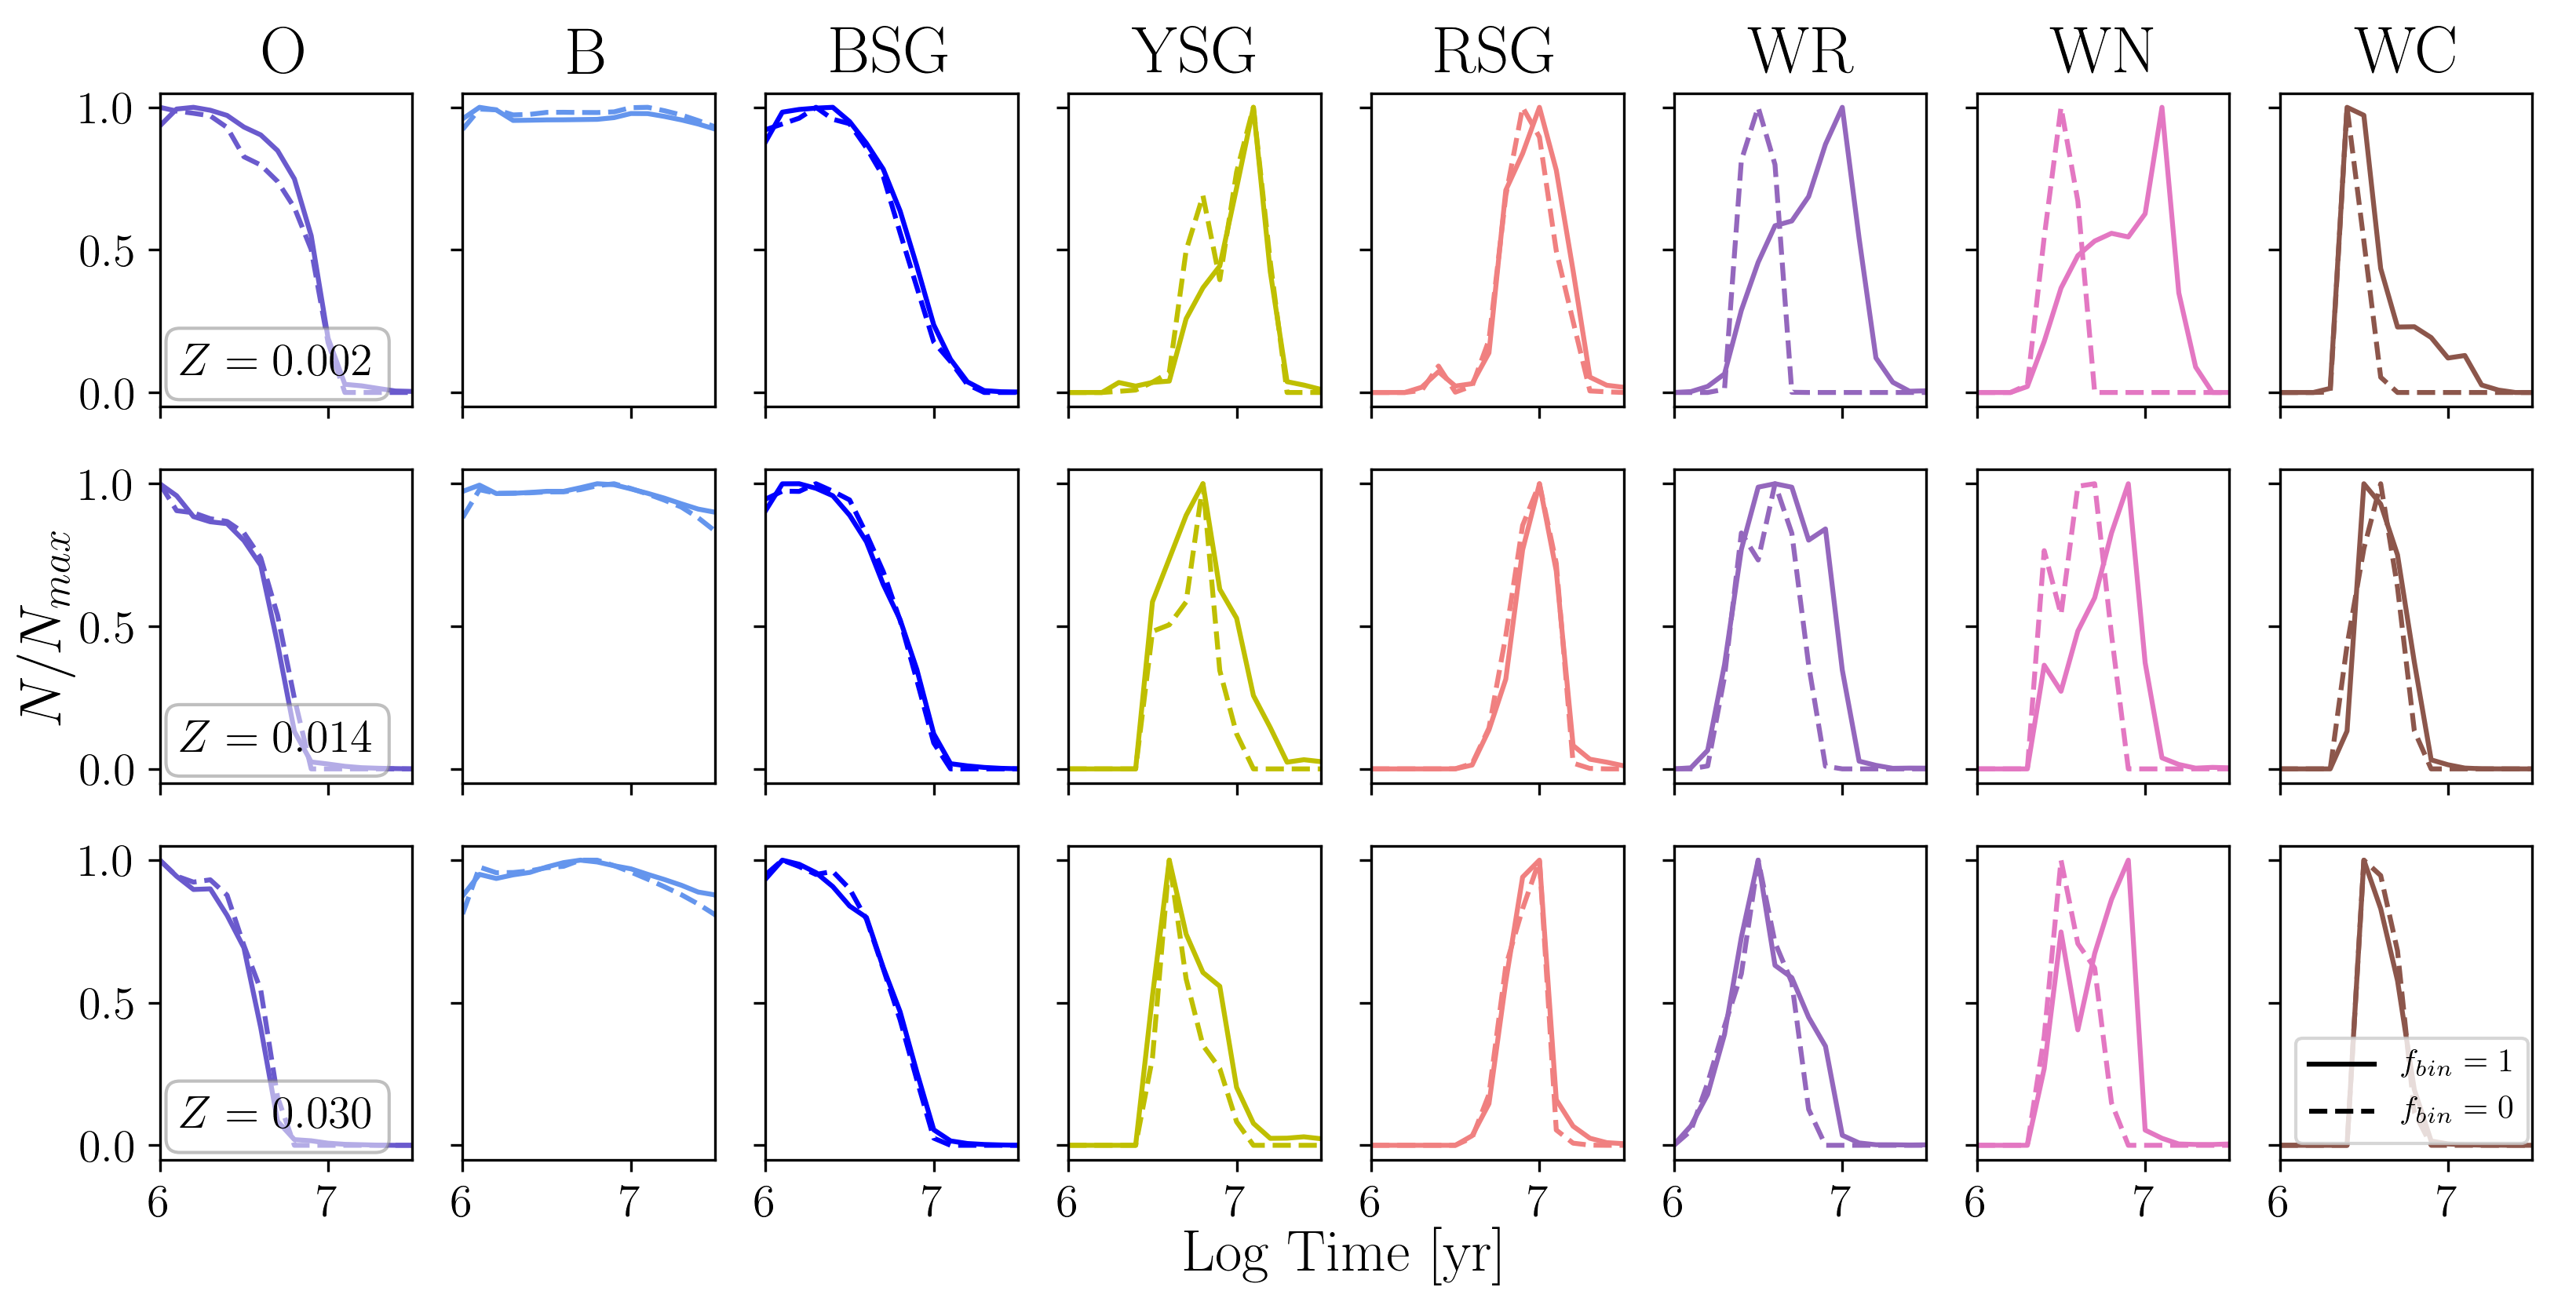

In [2]:
fig, axes = plt.subplots(3,8,figsize=(13,6),dpi=300,sharex=True,sharey=True)

types = ['O','B','BSG','YSG','RSG','WR','WN','WC']
Lcut = [0.0,0.0,4.9,4.9,4.9,4.9,4.9,4.9]
Cs = ['slateblue','cornflowerblue','b','y','lightcoral','C4','C6','C5']

z_plot = ['z002','z014','z030']

for i,z in enumerate(z_plot):
    for j,t in enumerate(types):
        ax = axes[i,j]
        sarr = get_arrs(t,z,Lcut=Lcut[j])[1]
        barr = get_arrs(t,z,Lcut=Lcut[j])[0]
        s = sarr/np.max(sarr)
        b = barr/np.max(barr)
        ax.plot(logages,b,c=Cs[j],ls='-')
        ax.plot(logages,s,c=Cs[j],ls='--')

for j,t in enumerate(types):
    axes[0,j].set(title=t)
axes[0,0].set(xlim=(6,7.5))

#Axis labels
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
labax.set_xlabel('Log Time [yr]',fontsize=18,family='serif')
labax.set_ylabel(r'$N/N_{max}$',fontsize=18,family='serif')
labax.set_zorder(-1)

#Legends and annotations
axes[2,7].legend(handles=[mlines.Line2D([], [], color='k',ls=l,label=p) for p,l in zip([r'$f_{bin} = 1$',r'$f_{bin} = 0$'],['-','--'])],loc=3)

Z_labels = [r'$Z=0.002$',r'$Z=0.014$',r'$Z=0.030$']
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
for i,lab in enumerate(Z_labels):
    axes[i,0].text(6.7, 0.1, lab, ha="center", va="center", size=14,bbox=bbox_props)
    
for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax.title.set_fontsize(20)
    
plt.savefig('binary_vs_single_counts.pdf')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide
/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


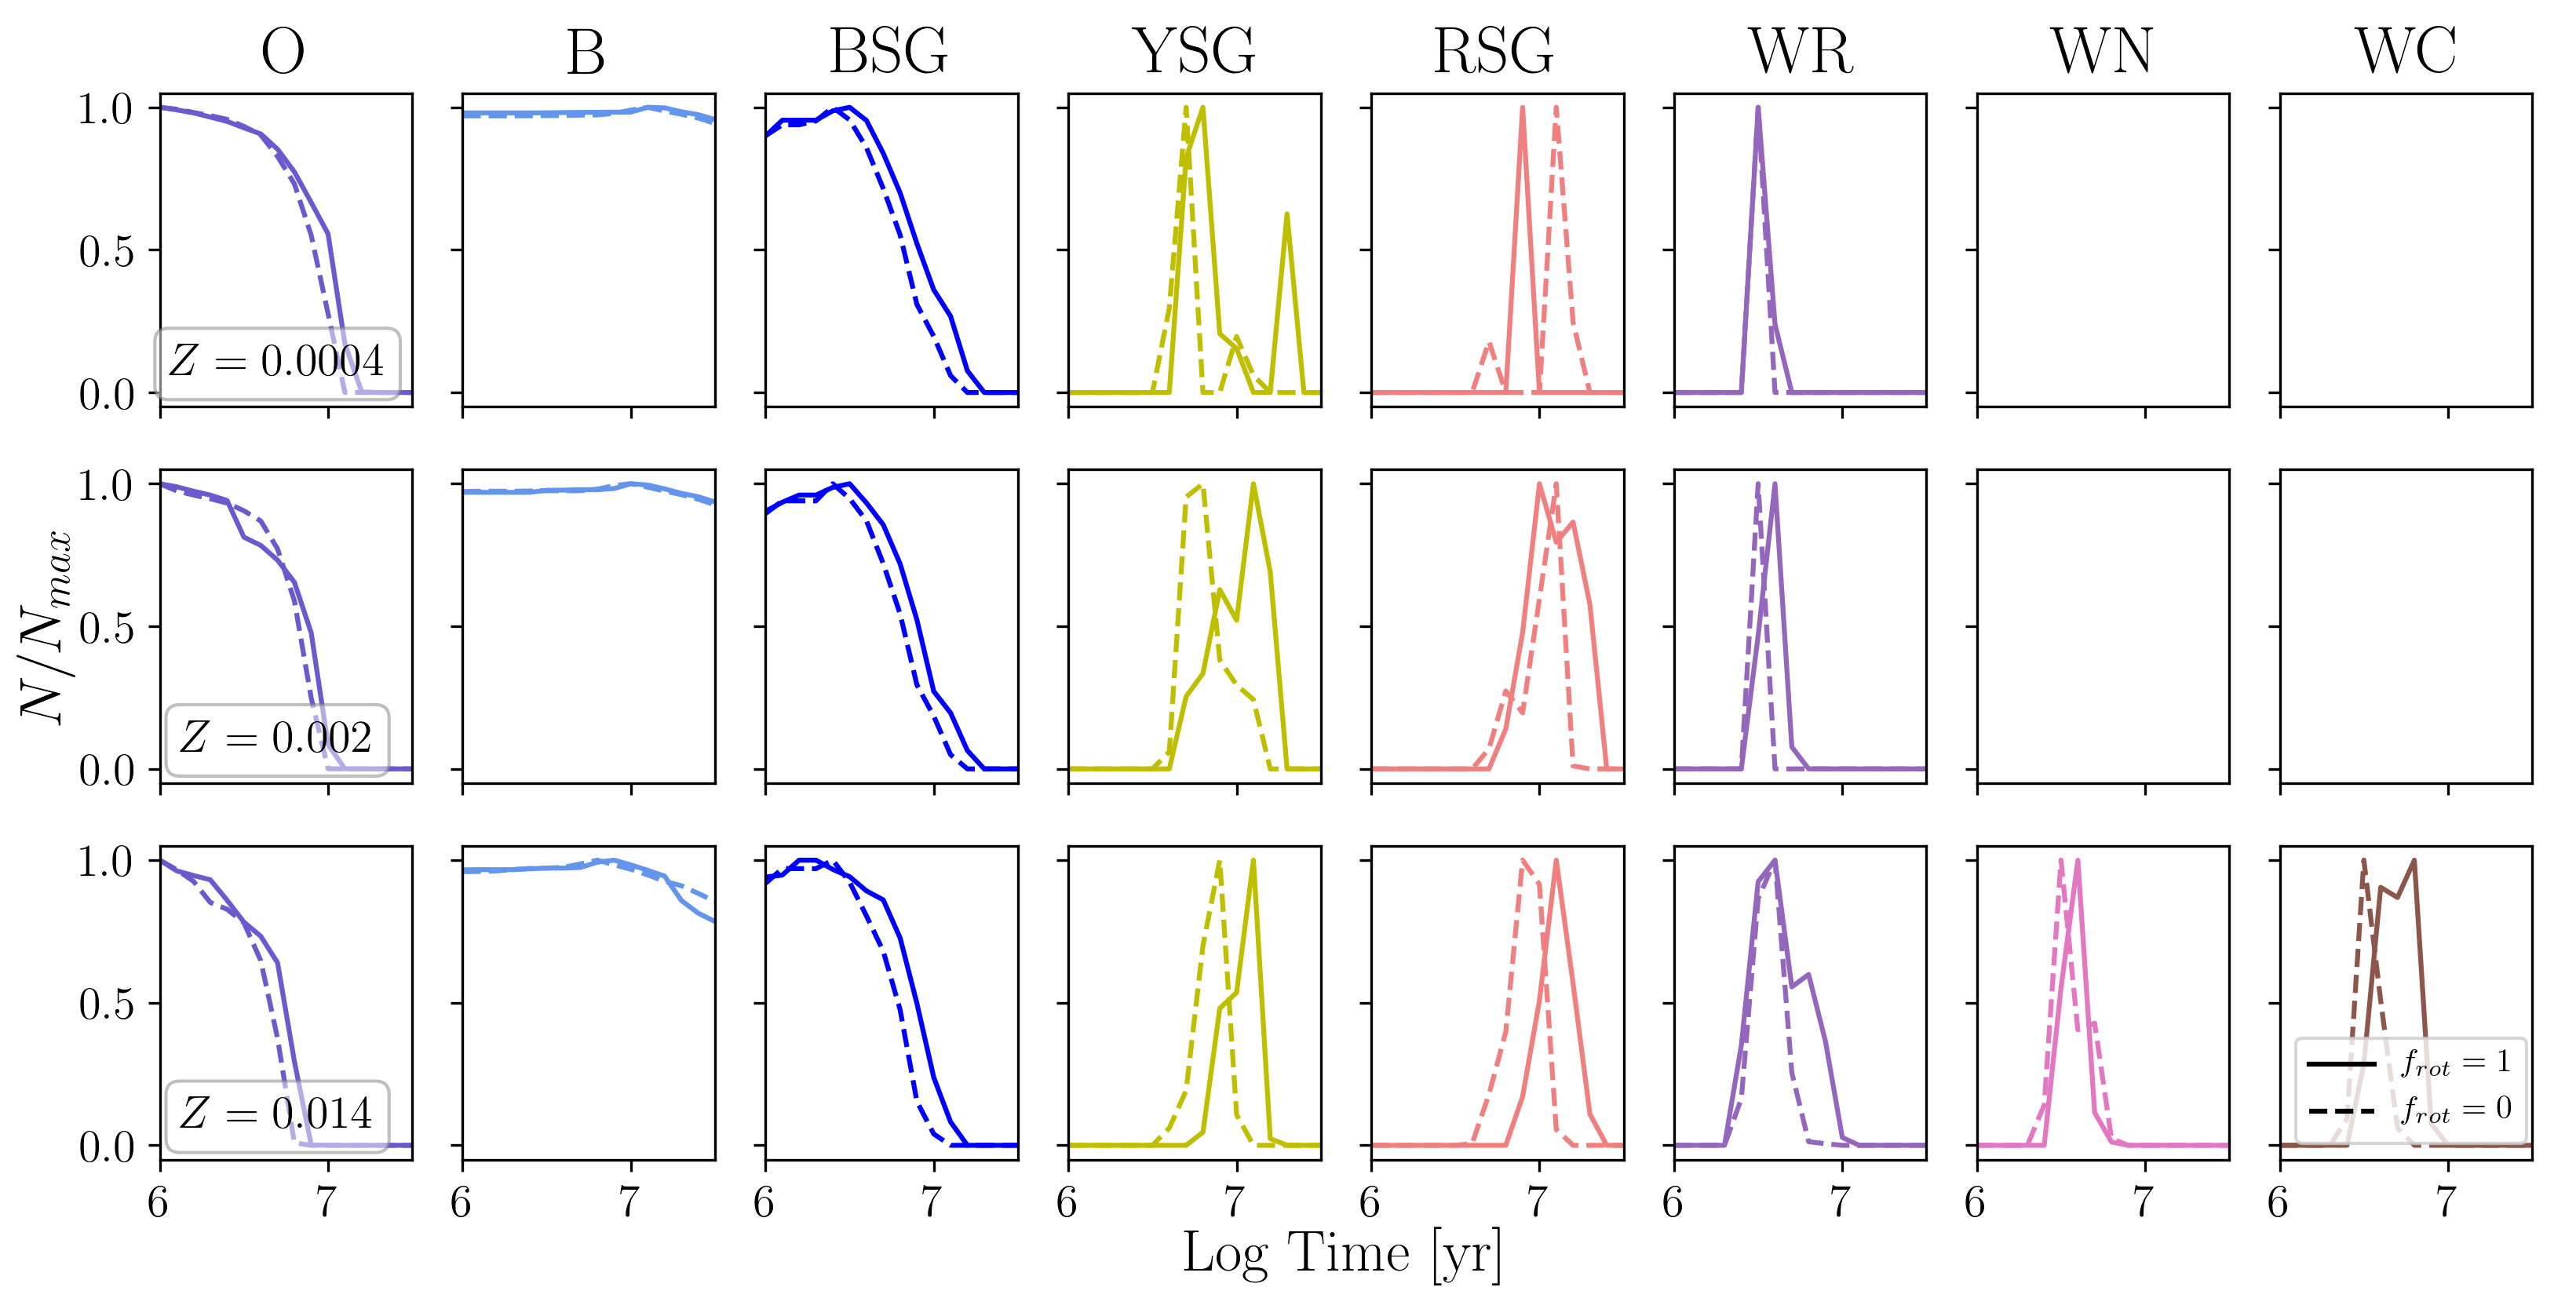

In [4]:
fig, axes = plt.subplots(3,8,figsize=(13,6),dpi=300,sharex=True,sharey=True)

types = ['O','B','BSG','YSG','RSG','WR','WN','WC']
Lcut = [0.0,0.0,4.9,4.9,4.9,4.9,4.9,4.9]
Cs = ['slateblue','cornflowerblue','b','y','lightcoral','C4','C6','C5']

z_plot = ['z0004','z002','z014']

for i,z in enumerate(z_plot):
    for j,t in enumerate(types):
        ax = axes[i,j]
        sarr = get_arrs(t,z,models='Geneva',Lcut=Lcut[j])[1]
        barr = get_arrs(t,z,models='Geneva',Lcut=Lcut[j])[0]
        s = sarr/np.max(sarr)
        b = barr/np.max(barr)
        ax.plot(logages,b,c=Cs[j],ls='-')
        ax.plot(logages,s,c=Cs[j],ls='--')

for j,t in enumerate(types):
    axes[0,j].set(title=t)
axes[0,0].set(xlim=(6,7.5))

#Axis labels
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
labax.set_xlabel('Log Time [yr]',fontsize=18,family='serif')
labax.set_ylabel(r'$N/N_{max}$',fontsize=18,family='serif')
labax.set_zorder(-1)

#Legends and annotations
axes[2,7].legend(handles=[mlines.Line2D([], [], color='k',ls=l,label=p) for p,l in zip([r'$f_{rot} = 1$',r'$f_{rot} = 0$'],['-','--'])],loc=3)

Z_labels = [r'$Z=0.0004$',r'$Z=0.002$',r'$Z=0.014$']
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
for i,lab in enumerate(Z_labels):
    axes[i,0].text(6.7, 0.1, lab, ha="center", va="center", size=14,bbox=bbox_props)
    
for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax.title.set_fontsize(20)
    
plt.savefig('rotating_vs_not_counts.pdf')

Text(0, 0.5, '$N_{WR}$')

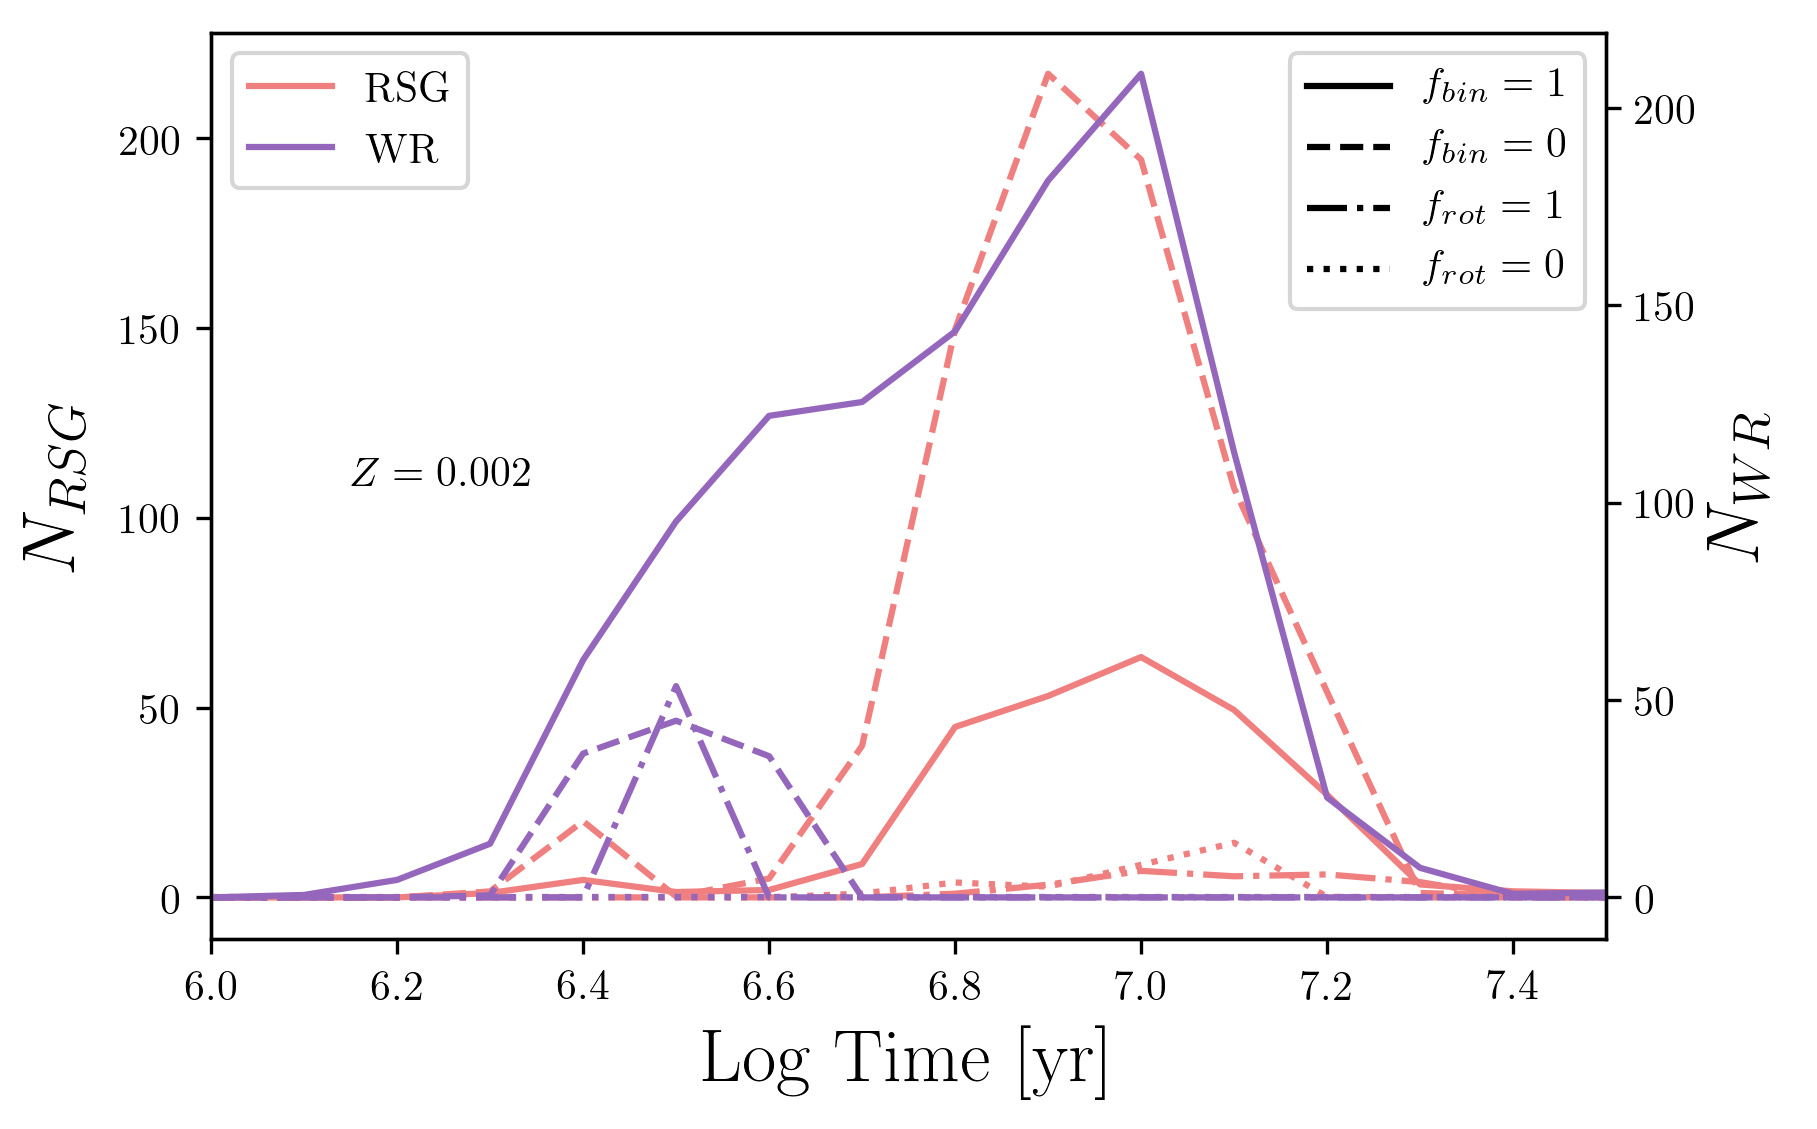

In [8]:
fig,a1 = plt.subplots(dpi=300)
a2 = plt.twinx(a1)

types = ['RSG','WR']
Lcut = [4.9,4.9]
Cs = ['lightcoral','C4']
sarrs = np.array([get_arrs(t,'z002',Lcut=l)[1] for t,l in zip(types,Lcut)])
barrs = np.array([get_arrs(t,'z002',Lcut=l)[0] for t,l in zip(types,Lcut)])

narrs = np.array([get_arrs(t,'z002',Lcut=l,models='Geneva')[1] for t,l in zip(types,Lcut)])
rarrs = np.array([get_arrs(t,'z002',Lcut=l,models='Geneva')[0] for t,l in zip(types,Lcut)])

for t,s,b,n,r,c,a in zip(types,sarrs,barrs,narrs,rarrs,Cs,[a1,a2]):
    a.plot(logages,b,c=c,ls='-')
    a.plot(logages,s,c=c,ls='--')
    a.plot(logages,n,c=c,ls=':')
    a.plot(logages,r,c=c,ls='-.')

a1.legend(handles=[mlines.Line2D([], [], color='k',ls=l,label=p) for p,l in zip([r'$f_{bin} = 1$',r'$f_{bin} = 0$',r'$f_{rot} = 1$',r'$f_{rot} = 0$'],['-','--','-.',':'])],loc=1)
a2.legend(handles=[mlines.Line2D([], [], color=c,ls='-',label=p) for p,c in zip(types,Cs)],loc=2)

plt.annotate(r'$Z=0.002$', xy=(0,0), xycoords='axes fraction', xytext=(0.1, 0.5), textcoords='axes fraction')

a2.set_xlim(6,7.5)

a1.set_xlabel('Log Time [yr]',fontsize=18)
a1.set_ylabel('$N_{RSG}$',fontsize=18)
a2.set_ylabel('$N_{WR}$',fontsize=18)

Plenty of people use various number count ratios as diagnostics of a stellar population. We want to explore the effect of binaries on these diagnostics for both symple and complex stellar populations.

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(16,6),dpi=300)

for f_bin in f_bins:
    axes[0,0].semilogy(logages,[get_ratio_at_parameter('BSG/RSG','z014',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,1].semilogy(logages,[get_ratio_at_parameter('WR/RSG','z014',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,2].semilogy(logages,[get_ratio_at_parameter('WC/WN','z014',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,3].semilogy(logages,[get_ratio_at_parameter('WR/O','z014',t,f_bin,Lcut1=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,4].semilogy(logages,[get_ratio_at_parameter('O/BSG','z014',t,f_bin,Lcut2=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,0].semilogy(logages,[get_ratio_at_parameter('BSG/RSG','z002',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,1].semilogy(logages,[get_ratio_at_parameter('WR/RSG','z002',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,2].semilogy(logages,[get_ratio_at_parameter('WC/WN','z002',t,f_bin,Lcut=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,3].semilogy(logages,[get_ratio_at_parameter('WR/O','z002',t,f_bin,Lcut1=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,4].semilogy(logages,[get_ratio_at_parameter('O/BSG','z002',t,f_bin,Lcut2=4.9) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    

axes[0,0].annotate(r'$Z=0.014$', xy=(0,0), xycoords='axes fraction', xytext=(0.5, 0.75), textcoords='axes fraction', fontsize=17)
axes[1,0].annotate(r'$Z=0.002$', xy=(0,0), xycoords='axes fraction', xytext=(0.5, 0.75), textcoords='axes fraction', fontsize=17)

axes[1,0].set(ylabel='$B/R$',xlabel='Log Time [yr]',xlim=(6.5,7.5))
axes[1,1].set(ylabel='$WR/RSG$',xlabel='Log Time [yr]',xlim=(6.5,8))
axes[1,2].set(ylabel='$WC/WN$',xlabel='Log Time [yr]',xlim=(6.4,6.9))
axes[1,3].set(ylabel='$WR/O$',xlabel='Log Time [yr]',xlim=(6,8))
axes[1,4].set(ylabel='$O/BSG$',xlabel='Log Time [yr]',xlim=(6,7.75))
axes[0,0].set(ylabel='$B/R$',xlim=(6.5,7.5))
axes[0,1].set(ylabel='$WR/RSG$',xlim=(6.5,8))
axes[0,2].set(ylabel='$WC/WN$',xlim=(6.4,6.9))
axes[0,3].set(ylabel='$WR/O$',xlim=(6,8))
axes[0,4].set(ylabel='$O/BSG$',xlim=(6,7.75))

for ax in axes.flatten():
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)

fig.tight_layout()

cbax = fig.add_subplot(111)
cbax.set_position([0.875,0.375, 0.1, 0.03])
norm = colors.Normalize(vmin=0, vmax=1)
cb1 = cbar.ColorbarBase(cbax, cmap=bcmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$f_{bin}$',fontsize=20)
cb1.set_ticks([0,0.5,1])
cb1.ax.tick_params(labelsize=14)

for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

plt.savefig('../plots/ratios_burstSFH.eps')
plt.savefig('../plots/ratios_burstSFH.pdf')

Clearly binarity can introduce order-of-magnitude spread in these ratios, and thus should be detectable. What if we assume a more strenuous luminosity cutoff? I.e., we're only complete down to $\log{L/L_\odot}=5.2$ for a cluster at the galactic center with lots of extinction. 

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(16,6),dpi=300)

for f_bin in f_bins:
    axes[0,0].semilogy(logages,[get_ratio_at_parameter('BSG/RSG','z014',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,1].semilogy(logages,[get_ratio_at_parameter('WR/RSG','z014',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,2].semilogy(logages,[get_ratio_at_parameter('WC/WN','z014',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,3].semilogy(logages,[get_ratio_at_parameter('WR/O','z014',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,4].semilogy(logages,[get_ratio_at_parameter('O/BSG','z014',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,0].semilogy(logages,[get_ratio_at_parameter('BSG/RSG','z002',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,1].semilogy(logages,[get_ratio_at_parameter('WR/RSG','z002',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,2].semilogy(logages,[get_ratio_at_parameter('WC/WN','z002',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,3].semilogy(logages,[get_ratio_at_parameter('WR/O','z002',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,4].semilogy(logages,[get_ratio_at_parameter('O/BSG','z002',t,f_bin,Lcut=5.2) for t in logages],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    

axes[0,0].annotate(r'$Z=0.014$', xy=(0,0), xycoords='axes fraction', xytext=(0.5, 0.75), textcoords='axes fraction', fontsize=17)
axes[1,0].annotate(r'$Z=0.002$', xy=(0,0), xycoords='axes fraction', xytext=(0.5, 0.75), textcoords='axes fraction', fontsize=17)

axes[1,0].set(ylabel='$B/R$',xlabel='Log Time [yr]',xlim=(6.5,7.5))
axes[1,1].set(ylabel='$WR/RSG$',xlabel='Log Time [yr]',xlim=(6.5,8))
axes[1,2].set(ylabel='$WC/WN$',xlabel='Log Time [yr]',xlim=(6.4,6.9))
axes[1,3].set(ylabel='$WR/O$',xlabel='Log Time [yr]',xlim=(6,8))
axes[1,4].set(ylabel='$O/BSG$',xlabel='Log Time [yr]',xlim=(6,7.75))
axes[0,0].set(ylabel='$B/R$',xlim=(6.5,7.5))
axes[0,1].set(ylabel='$WR/RSG$',xlim=(6.5,8))
axes[0,2].set(ylabel='$WC/WN$',xlim=(6.4,6.9))
axes[0,3].set(ylabel='$WR/O$',xlim=(6,8))
axes[0,4].set(ylabel='$O/BSG$',xlim=(6,7.75))

for ax in axes.flatten():
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)

fig.tight_layout()

cbax = fig.add_subplot(111)
cbax.set_position([0.675,0.72, 0.1, 0.03])
norm = colors.Normalize(vmin=0, vmax=1)
cb1 = cbar.ColorbarBase(cbax, cmap=bcmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$f_{bin}$',fontsize=18)
cb1.set_ticks([0,0.5,1])
cb1.ax.tick_params(labelsize=14)

for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

plt.savefig('../plots/ratios_burstSFH_incomplete.eps')
plt.savefig('../plots/ratios_burstSFH_incomplete.pdf')

We can compare some of these predictions with data from an actual cluster, Westerlund 1. Here's the data, from Crowther et al. (2006, MNRAS) and Clark et al. (2005, A&A). Using single-star diagnostics, Westerlund 1's age is $\approx4.5$ Myr. Here we adopt $Z=Z_\odot$.

In [ ]:
#Westerlund 1 data from Crowther+06 MNRAS, Clark+05 A&A
WC_W = 8.0
WN_W = 16.0
WR_W = WC_W + WN_W
O_W = 22.0
RSG_W = 3.0
BSG_W = 29.0

In [ ]:
fig, ax = plot_ratios(ratio1='WR/RSG',ratio2='O/BSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(4.9,4.9,0.0,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
BR_W,BR_W_err = calc_ratio_err(WR_W,RSG_W)
OBSG_W,OBSG_W_err = calc_ratio_err(O_W,BSG_W)

ax[0].errorbar(BR_W,OBSG_W,xerr=BR_W_err,yerr=OBSG_W_err,label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=4)
ax[0].set(title='',xlim=(0.3,1e3))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,6)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.05,ax1_pos.y0, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
        
plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69.eps')
plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69.pdf')

Not bad! We get a slightly old age than most studies, and a high binary fraction. One problem: the data probably aren't complete. If we adopt completeness limits that are consistent with the data:

In [ ]:
fig, ax = plot_ratios(ratio1='WR/RSG',ratio2='O/BSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(5.1,4.9,4.9,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
BR_W,BR_W_err = calc_ratio_err(WR_W,RSG_W)
OBSG_W,OBSG_W_err = calc_ratio_err(O_W,BSG_W)

ax[0].errorbar(BR_W,OBSG_W,xerr=BR_W_err,yerr=OBSG_W_err,label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=4)
ax[0].set(title='',xlim=(0.3,1e3))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,6)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.05,ax1_pos.y0, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69_incomplete.eps')
plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69_incomplete.pdf')

What about if we are overly conservative when estimating the completeness limits?

In [ ]:
fig, ax = plot_ratios(ratio1='WR/RSG',ratio2='O/BSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcut':5.2})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
BR_W,BR_W_err = calc_ratio_err(WR_W,RSG_W)
OBSG_W,OBSG_W_err = calc_ratio_err(O_W,BSG_W)

ax[0].errorbar(BR_W,OBSG_W,xerr=BR_W_err,yerr=OBSG_W_err,label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=4)
ax[0].set(title='',xlim=(0.3,1e3))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,6)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.05,ax1_pos.y0, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69_veryincomplete.eps')
plt.savefig('../plots/WRRSG_OBSG_z014_logt_64_69_veryincomplete.pdf')

In [ ]:
fig, ax = plot_ratios(ratio1='WR/RSG',ratio2='O/BSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcut':5.2})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
BR_W,BR_W_err = calc_ratio_err(WR_W,RSG_W)
OBSG_W,OBSG_W_err = calc_ratio_err(O_W,BSG_W)

ax[0].errorbar(BR_W,OBSG_W,xerr=BR_W_err,yerr=OBSG_W_err,label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].set(title='',xlim=(0.3,1e3))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,6)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.05,ax1_pos.y0, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.savefig('/Users/carina/Desktop/WRRSG_OBSG_veryincomplete.pdf')

So completeness can really change things. Note: most studies don't actually include completeness when comparing models to data. Now, how do these ratios do in an older cluster? Unfortunately, no ~20 Myr old WRs are known, so we can't do any comparisons now.

In [ ]:
fig, ax = plot_ratios(ratio1='WR/RSG',ratio2='O/BSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.9,7.4),'Lcuts':(4.9,4.9,0.0,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
ax[0].set(title='',xlim=(5e-4,2))#,ylim=(1e-8,2e-2))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,7)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.075,ax1_pos.y0+0.1, ax1_pos.width, ax1_pos.height])
plt.savefig('../plots/WRRSG_OBSG_z014_logt_69_75.eps')
plt.savefig('../plots/WRRSG_OBSG_z014_logt_69_75.pdf')

Another question: let's say that you want to actually constrain $f_{bin}$ to within 10%. Based on these plots, a typical errorbar on a ratio should be $\sim0.1$ dex.

Let's conduct a simple test. Let's "observe" 1000 clusters. For each one, assume the cluster has a random number of stars of a given species A between 10 and 10000. Let's say the underlying ratio A/B is 0.5. Draw the observed number of A and B from Poisson distributions, then calculate the naive ($\sqrt{N}$) errors. How many of species A do you need to observe before the error on A/B is $\lesssim0.1$ dex?

In [ ]:
trials = 1000
hilog = 4
lolog = 1
ratios = []
errors = []
nums = []
for i in range(trials):
    num = np.power(10.0,np.random.uniform(low=lolog,high=hilog))
    num1 = np.random.poisson(num)
    num2 = np.random.poisson(0.5*num)
    r,e = calc_ratio_err(num1,num2)
    ratios.append(r)
    errors.append(e)
    nums.append(num)

plt.scatter(nums,errors,s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of A')
plt.ylabel('Error on Ratio A/B, assuming true ratio is 0.5')
#if log of ratio is -0.3, and log error is +/- 0.1 dex, that's an error of ~0.1.
plt.axhline(y=0.1,ls='--',c='k',label='0.1 dex error')
plt.legend()
#So basically, observations of ~1000 stars should get you the precision you need. 
#But even with ~100 you can do ok.

We've also implemented complex star formation histories! For now, let's just stick with something constantly forming stars. First, let's check that, even though we weight each BPASS time bin identically, only the youngest bins are contributing.

In [ ]:
fig = plt.figure(figsize=(15,12),dpi=300)

labax = fig.add_subplot(111)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312,sharex=ax1)
ax3 = fig.add_subplot(313,sharex=ax1)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
fig.subplots_adjust(wspace=0.1,hspace=0)
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)


types = ['O','B','BSG','YSG','RSG','WR','WN','WC']
Lcut = [4.0,4.0,4.9,4.9,4.9,4.9,4.9,4.9]
Cs = ['cornflowerblue','lightblue','b','y','lightcoral','C4','C6','C5']

z_plot = ['z014','z002','z030']
for z,ax in zip(z_plot,[ax1,ax2,ax3]):
    sarrs = np.array([get_arrs(t,z,Lcut=l,SFH='const')[1] for t,l in zip(types,Lcut)])
    barrs = np.array([get_arrs(t,z,Lcut=l,SFH='const')[0] for t,l in zip(types,Lcut)])
    sarrs = sarrs/np.max(sarrs,axis=1)[:,None]
    barrs = barrs/np.max(barrs,axis=1)[:,None]

    for t,s,b,c in zip(types,sarrs,barrs,Cs):
        ax.plot(logages,b,c=c,ls='-')
        ax.plot(logages,s,c=c,ls='--')

ax1.legend(handles=[mlines.Line2D([], [], color=c,ls='-',label=p) for p,c in zip(types,Cs)],loc=4)
ax2.legend(handles=[mlines.Line2D([], [], color='k',ls=l,label=p) for p,l in zip([r'$f_{bin} = 1$',r'$f_{bin} = 0$'],['-','--'])],loc=1)

#ax1.set_xlim(6,7.5)

ax1.annotate(r'$Z=0.014$', xy=(0,0), xycoords='axes fraction', xytext=(0.1, 0.5), textcoords='axes fraction')
ax2.annotate(r'$Z=0.002$', xy=(0,0), xycoords='axes fraction', xytext=(0.1, 0.5), textcoords='axes fraction')
ax3.annotate(r'$Z=0.03$', xy=(0,0), xycoords='axes fraction', xytext=(0.1, 0.5), textcoords='axes fraction')

labax.set_xlabel('Log Time [yr]',fontsize=18,family='serif')
labax.set_ylabel(r'$N/N_{max}$',fontsize=18,family='serif')

plt.savefig('../plots/all_comp_all_met_constSFH.eps')

Great! Looks like the populations more-or-less level out after 10-100 Myr. Now, let's check out our ratios. 

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(8,6),dpi=300,sharex=True)

for f_bin in f_bins:
    axes[0,0].loglog(z_float,[get_ratio_at_parameter('BSG/RSG',z,np.log10(13.7e9),f_bin,SFH='const',Lcut=4.9) for z in zs],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,1].loglog(z_float,[get_ratio_at_parameter('WR/RSG',z,np.log10(13.7e9),f_bin,SFH='const',Lcut=4.9) for z in zs],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,0].loglog(z_float,[get_ratio_at_parameter('WC/WN',z,np.log10(13.7e9),f_bin,SFH='const',Lcut=4.9) for z in zs],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,1].loglog(z_float,[get_ratio_at_parameter('WR/O',z,np.log10(13.7e9),f_bin,SFH='const',Lcut=4.9) for z in zs],c=bcmap(f_bin),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    
axes[0,0].set(ylabel='$B/R$')
axes[0,1].set(ylabel='$WR/RSG$')
axes[1,0].set(ylabel='$WC/WN$',xlabel='Z')
axes[1,1].set(ylabel='$WR/O$',xlabel='Z')

for ax in axes.flatten():
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    
fig.tight_layout()

cbax = fig.add_subplot(111)
cbax.set_position([0.25,0.2, 0.2, 0.03])
norm = colors.Normalize(vmin=0, vmax=1)
cb1 = cbar.ColorbarBase(cbax, cmap=bcmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$f_{bin}$',fontsize=18)
cb1.set_ticks([0,0.5,1])
cb1.ax.tick_params(labelsize=14)

for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)


plt.savefig('../plots/ratios_constSFH.eps')
plt.savefig('../plots/ratios_constSFH.pdf')

Now let's compare to the actual observed numbers. Here they are, plus citations.

In [ ]:
#WR/O - Maeder & Meynet 1994
WRO_M31 = 0.24
WRO_IMW = 0.205 #inner milky way
WRO_MMW = 0.104 #middle milky way
WRO_OMW = 0.033 #outer milky way
WRO_M33 = 0.06
WRO_LMC = 0.04
WRO_N6822 = 0.02
WRO_SMC = 0.017
WRO_IC1613 = 0.02

#B/R - Massey & Olsen 2003
BR_SMC,BR_SMC_err = calc_ratio_err(1484,90)
BR_LMC,BR_LMC_err = calc_ratio_err(3164,234)

#WC/WN - Rosslowe & Crowther 2015 for galactic, Neugent & Massey 11/12/18 for MCs, M33, M31, & Armandrov & Massey for N6822 and IC 1613
WCWN_IMW,WCWN_IMW_err = calc_ratio_err(63,124)
WCWN_MMW,WCWN_MMW_err = calc_ratio_err(46,86)
WCWN_OMW,WCWN_OMW_err = calc_ratio_err(10,25)
WCWN_SMC,WCWN_SMC_err = calc_ratio_err(1,11)
WCWN_LMC,WCWN_LMC_err = calc_ratio_err(26,128)
WCWN_M31,WCWN_M31_err = 0.67,0.11
WCWN_M33,WCWN_M33_err = 0.58,0.14
WCWN_N6822,WCWN_N6822_err = calc_ratio_err(1,11)
WCWN_IC1613,WCWN_IC1613_err = calc_ratio_err(1,6)

#WR/RSG #Massey & Olsen 03, Neugent+18
WRRSG_SMC,WRRSG_SMC_err = calc_ratio_err(12,90)
WRRSG_LMC,WRRSG_LMC_err = calc_ratio_err(154,234)

In [ ]:
fig, ax = plot_ratios(ratio1='BSG/RSG',ratio2='WR/RSG',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9),'z':('zem5','z004')},SFH='const')
fig.set_figheight(7)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(BR_SMC,WRRSG_SMC,xerr=BR_SMC_err,yerr=WRRSG_SMC_err,marker='*',mec='k',ms=15,label='SMC',zorder=50,lw=4,)
ax[0].errorbar(BR_LMC,WRRSG_LMC,xerr=BR_LMC_err,yerr=WRRSG_LMC_err,marker='*',mec='k',ms=15,label='LMC',zorder=50,lw=4,)
ax[0].legend(loc=2)
ax[0].set(title='')

ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,7)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.09,ax1_pos.y0+0.08, ax1_pos.width*.85, ax1_pos.height*.85])

ax[1].xaxis.set_tick_params(color='w')
ax[1].yaxis.set_tick_params(color='w')

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

ax[0].set_xlabel('$B/R$')

plt.savefig('../plots/BR_WRRSG_constSFH.eps')
plt.savefig('../plots/BR_WRRSG_constSFH.pdf')

In [ ]:
fig, ax = plot_ratios(ratio1='WC/WN',ratio2='WR/O',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9),'z':('zem4','z040')},SFH='const')
fig.set_figheight(7)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(WCWN_SMC,WRO_SMC,xerr=WCWN_SMC_err,marker='*',mec='k',ms=15,label='SMC',zorder=50,lw=4)
ax[0].errorbar(WCWN_LMC,WRO_LMC,xerr=WCWN_LMC_err,marker='*',mec='k',ms=15,label='LMC',zorder=50,lw=4)
ax[0].errorbar(WCWN_MMW,WRO_IMW,xerr=WCWN_MMW_err,marker='*',mec='k',ms=15,label='Inner MW',zorder=50,lw=4)
ax[0].errorbar(WCWN_MMW,WRO_MMW,xerr=WCWN_MMW_err,marker='*',mec='k',ms=15,label='Middle MW',zorder=50,lw=4)
ax[0].errorbar(WCWN_MMW,WRO_OMW,xerr=WCWN_MMW_err,marker='*',mec='k',ms=15,label='Outer MW',zorder=50,lw=4)
ax[0].errorbar(WCWN_M31,WRO_M31,xerr=WCWN_M31_err,marker='*',mec='k',ms=15,label='M31',zorder=50,lw=4)
ax[0].errorbar(WCWN_M33,WRO_M33,xerr=WCWN_M33_err,marker='*',mec='k',ms=15,label='M33',zorder=50,lw=4)
ax[0].errorbar(WCWN_N6822,WRO_N6822,xerr=WCWN_N6822_err,marker='*',mec='k',ms=15,label='NGC 6822',zorder=50,lw=4)
ax[0].errorbar(WCWN_IC1613,WRO_IC1613,xerr=WCWN_IC1613_err,marker='*',mec='k',ms=15,label='IC 1613',zorder=50,lw=4)
ax[0].legend(loc=2)
ax[0].set(title='')

ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,7)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.11,ax1_pos.y0+0.08, ax1_pos.width*0.85, ax1_pos.height*0.85])

ax[1].xaxis.set_tick_params(color='w')
ax[1].yaxis.set_tick_params(color='w')

ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.savefig('../plots/WRO_WCWN_constSFH.eps')
plt.savefig('../plots/WRO_WCWN_constSFH.pdf')

Some interesting implications here: maybe $f_{bin}$ and $Z$ are related. If $WR/O$ really is a good $f_{bin}$ diagnostic, then it should correlate with $Z$

In [ ]:
plt.figure(dpi=300)
Z_plots = [0.002,0.006,0.029,0.020,0.013,0.035,0.013,0.005,0.002]
WRO_plots = [WRO_SMC,WRO_LMC,WRO_IMW,WRO_MMW,WRO_OMW,WRO_M31,WRO_M33,WRO_N6822,WRO_IC1613]
labels = ['SMC','LMC','Inner MW','Middle MW','Outer MW','M31','M33','NGC 6822','IC 1613']
for z,wro,lab,i in zip(Z_plots,WRO_plots,labels,range(len(Z_plots))):
    plt.scatter(z, wro, c='C{0}'.format(i), label=lab)
    if lab == 'SMC':
        plt.annotate(lab,xy=(z,wro),xytext=(z-0.001,0.75*wro))
    elif (lab == 'IC 1613') or (('MW' in lab)&(lab != 'Outer MW')) or (lab=='M33'):
        plt.annotate(lab,xy=(z,wro),xytext=(z-0.002,1.2*wro))
    elif (lab == 'LMC'):
        plt.annotate(lab,xy=(z,wro),xytext=(z+0.001,1.05*wro))
    else:
        plt.annotate(lab,xy=(z,wro),xytext=(z+0.001,1.005*wro))
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Z^*_{\rm actual}$',fontsize=18)
plt.ylabel('$WR/O$',fontsize=18)
plt.ylim(1e-2,1)
plt.xlim(0,0.04)
p0 = np.polyfit(Z_plots,np.log10(WRO_plots),deg=1)
Z_test = np.linspace(0,0.04,100)
logWR_out = np.polyval(p0,Z_test)
plt.plot(Z_test,np.power(10.0,logWR_out),'--k',label='Fit')
#plt.legend(loc=2)
plt.savefig('../plots/WRO_vs_Z.eps')
plt.savefig('../plots/WRO_vs_Z.pdf')